My first linear model from scratch. The scope of this project is to learn how to apply an ordinary least squares (OLS) solution in Python. I will choose an arbitrary linear relationship and generate noisy data around it and attempt to find a best-fitting line!

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform as u

In [157]:
# Generate noisy data around 3x=y
A = np.linspace(-10, 10, num=50)
y = np.ndarray(len(A))
for i in range(len(A)):
    y[i] = 3 * A[i] + 10 * u()

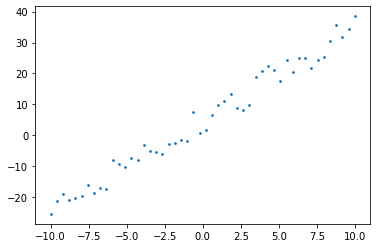

In [158]:
# View the data
plt.scatter(A, y, s=3)

In [159]:
# Reshape and add column of ones
A2 = np.resize(A, (50, 1))
ones = np.ones(len(A)).reshape((len(A), 1))
A2 = np.append(A2, ones, 1)
A2.shape

(50, 2)

In [160]:
# Apply OLS
x = np.linalg.lstsq(A2, y, rcond=None)

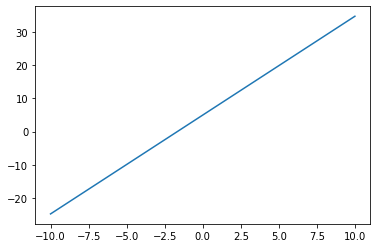

In [161]:
# Visualize solution
y_pred = x[0][0] * A + x[0][1]
plt.plot(A, y_pred)

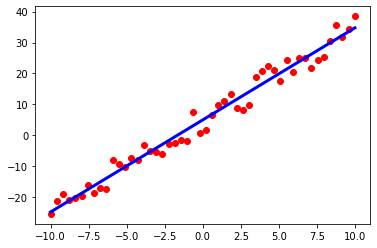

In [162]:
# Overlay data and solution
plt.plot(A, y, 'ro', A, y_pred, 'b', linewidth=3)

In [163]:
# Cannot easily determine the r^2 value, so let's try another way

In [164]:
from scipy.stats import linregress as lr

In [165]:
slope, intercept, r_val, p_val, std_err = lr(A, y)

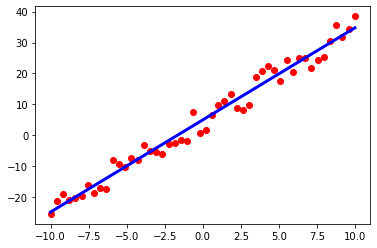

In [166]:
y2 = (slope * A) + intercept
plt.plot(A, y, 'ro', A, y2, 'b', linewidth=3)

In [167]:
# Comparing methods
print('Numpy solution: y = {}x + {}'.format(x[0][0], x[0][1]))
print('Scipy solution: y = {}x + {}'.format(slope, intercept))

Numpy solution: y = 2.980594997706461x + 4.965557534867557
Scipy solution: y = 2.9805949977064614x + 4.965557534867558


In [168]:
# R^2
print(r_val)

0.9877435597504897
